In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("sp500_2014_2.csv")

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", errors='coerce')
df.set_index('date', inplace=True)
stock_symbol = 'AAPL'
print(df.head(df[df['symbol'] == 'AAPL']))

TypeError: cannot do positional indexing on DatetimeIndex with these indexers [           symbol     open     high      low    close       volume
date                                                              
2014-01-02   AAPL  79.3828  79.5756  78.8601  79.0185   58791957.0
2014-01-03   AAPL  78.9799  79.0999  77.2042  77.2828   98303870.0
2014-01-06   AAPL  76.7785  78.1142  76.2285  77.7042  103359151.0
2014-01-07   AAPL  77.7599  77.9942  76.8464  77.1481   79432766.0
2014-01-08   AAPL  76.9728  77.9371  76.9556  77.6371   64686685.0
...           ...      ...      ...      ...      ...          ...
2014-07-09   AAPL  95.4400  95.9500  94.7600  95.3900   36436440.0
2014-07-10   AAPL  93.7600  95.5500  93.5200  95.0350   39685552.0
2014-07-11   AAPL  95.3600  95.8900  94.8625  95.2200   34018228.0
2014-07-14   AAPL  95.8600  96.8900  95.6500  96.4500   42810155.0
2014-07-15   AAPL  96.8000  96.8500  95.0300  95.3200   45696176.0

[134 rows x 6 columns]] of type DataFrame

In [ ]:
df = pd.read_csv("sp500_2014_2.csv")
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", errors='coerce')
df.set_index('date', inplace=True)
stock_symbol = 'AAPL'

df = df[['symbol', 'close']].dropna()

df_market = df.pivot_table(index=df.index, columns='symbol', values='close')
df_market['market_proxy'] = df_market.mean(axis=1)
df_market = df_market[[stock_symbol, 'market_proxy']].dropna()

df_returns = np.log(df_market / df_market.shift(1)).dropna()
print(df_market)
# #

symbol         AAPL  market_proxy
date                             
2014-01-02  79.0185     71.610728
2014-01-03  77.2828     71.666974
2014-01-06  77.7042     71.422432
2014-01-07  77.1481     72.006346
2014-01-08  77.6371     72.108015
...             ...           ...
2014-07-09  95.3900     78.679082
2014-07-10  95.0350     78.249834
2014-07-11  95.2200     78.376215
2014-07-14  96.4500     78.723166
2014-07-15  95.3200     79.134972

[134 rows x 2 columns]


In [ ]:
train_size = 0.8
train, test = train_test_split(df_returns, train_size=train_size, shuffle=False)

X_train = sm.add_constant(train['market_proxy'])
y_train = train[stock_symbol]
model = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(test['market_proxy'])
y_test = test[stock_symbol]
y_pred = model.predict(X_test)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     288.3
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.77e-55
Time:                        16:06:14   Log-Likelihood:                 2366.3
No. Observations:                 804   AIC:                            -4729.
Df Residuals:                     802   BIC:                            -4719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      0.852   

R² on Test Data: 0.2199
RMSE on Test Data: 0.010377


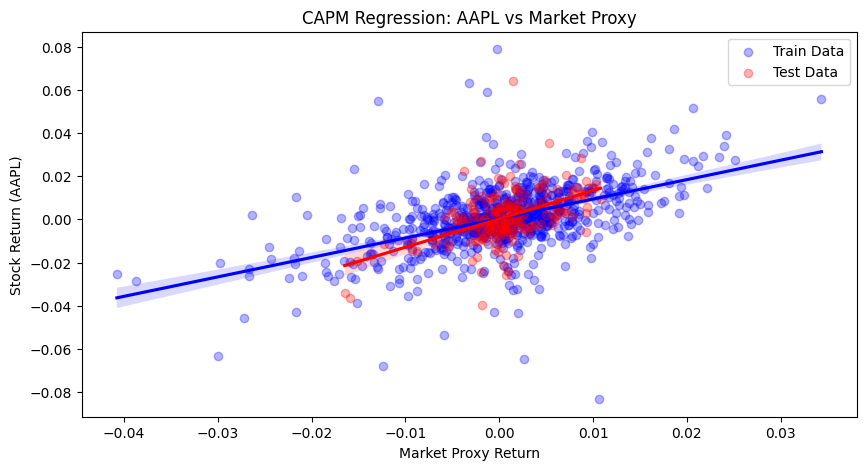

In [ ]:

# Evaluate Model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² on Test Data: {r2:.4f}")
print(f"RMSE on Test Data: {rmse:.6f}")

plt.figure(figsize=(10, 5))
sns.regplot(x=train['market_proxy'], y=train[stock_symbol], scatter_kws={"alpha":0.3}, label="Train Data", color="blue")
sns.regplot(x=test['market_proxy'], y=test[stock_symbol], scatter_kws={"alpha":0.3}, label="Test Data", color="red")
plt.title(f"CAPM Regression: {stock_symbol} vs Market Proxy")
plt.xlabel("Market Proxy Return")
plt.ylabel(f"Stock Return ({stock_symbol})")
plt.legend()
plt.show()


In [ ]:
# beta value is less volatile than market (0.9)